In [29]:
import numpy as np
import matplotlib.pyplot as plt

def DILILA(t,t_len, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit*(tinflect -t)
    denomsteps1 = gapinit* t + gapcrit * (tinflect - t)
    numstep2 = gapfin* dcrit*(t_len - t ) + gapcrit* dfin*(t-tinflect)
    denomsteps2 = gapfin*(t_len -t) +gapcrit*(t-tinflect)
    if t>t_len:
        out = dfin
    elif t>tinflect:
        out = numstep2/denomsteps2
    else:
        out = numstep1/denomsteps1
    return out


In [21]:
Rabi_ramp_time = 2.0
T_DiLILA=10.0
gapinit= 5.26
gapcrit = 0.767
gapfin = 1.63
dinit = -5.0
dcrit = 1.3
dfin = 3.0
auto_tinflect = 1


In [34]:
def Deltafunc(time):
    t = time - Rabi_ramp_time
    if auto_tinflect:  # automatcally generate the tinflect according to the detuning ratio
        tinflect = T_DiLILA*(dcrit-dinit)/(dfin-dinit)
    else:
        tinflect = params['t_inflect']
    if t<0:
        return dinit
    else:
        return DILILA(t,T_DiLILA, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect)

In [7]:
t = np.array([ 0.   ,  0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.6  ,  0.7  ,
        0.8  ,  0.9  ,  1.   ,  1.1  ,  1.2  ,  1.3  ,  1.4  ,  1.5  ,
        1.6  ,  1.7  ,  1.8  ,  1.9  ,  2.   ,  2.052,  2.104,  2.156,
        2.208,  2.26 ,  2.312,  2.364,  2.416,  2.468,  2.52 ,  2.572,
        2.624,  2.676,  2.728,  2.78 ,  2.832,  2.884,  2.936,  2.988,
        3.04 ,  3.092,  3.144,  3.196,  3.248,  3.3  ,  3.352,  3.404,
        3.456,  3.508,  3.56 ,  3.612,  3.664,  3.716,  3.768,  3.82 ,
        3.872,  3.924,  3.976,  4.028,  4.08 ,  4.132,  4.184,  4.236,
        4.288,  4.34 ,  4.392,  4.444,  4.496,  4.548,  4.6  ,  4.652,
        4.704,  4.756,  4.808,  4.86 ,  4.912,  4.964,  5.016,  5.068,
        5.12 ,  5.172,  5.224,  5.276,  5.328,  5.38 ,  5.432,  5.484,
        5.536,  5.588,  5.64 ,  5.692,  5.744,  5.796,  5.848,  5.9  ,
        5.952,  6.004,  6.056,  6.108,  6.16 ,  6.212,  6.264,  6.316,
        6.368,  6.42 ,  6.472,  6.524,  6.576,  6.628,  6.68 ,  6.732,
        6.784,  6.836,  6.888,  6.94 ,  6.992,  7.044,  7.096,  7.148,
        7.2  ,  7.252,  7.304,  7.356,  7.408,  7.46 ,  7.512,  7.564,
        7.616,  7.668,  7.72 ,  7.772,  7.824,  7.876,  7.928,  7.98 ,
        8.032,  8.084,  8.136,  8.188,  8.24 ,  8.292,  8.344,  8.396,
        8.448,  8.5  ,  8.552,  8.604,  8.656,  8.708,  8.76 ,  8.812,
        8.864,  8.916,  8.968,  9.02 ,  9.072,  9.124,  9.176,  9.228,
        9.28 ,  9.332,  9.384,  9.436,  9.488,  9.54 ,  9.592,  9.644,
        9.696,  9.748,  9.8  ,  9.852,  9.904,  9.956, 10.008, 10.06 ,
       10.112, 10.164, 10.216, 10.268, 10.32 , 10.372, 10.424, 10.476,
       10.528, 10.58 , 10.632, 10.684, 10.736, 10.788, 10.84 , 10.892,
       10.944, 10.996, 11.048, 11.1  , 11.152, 11.204, 11.256, 11.308,
       11.36 , 11.412, 11.464, 11.516, 11.568, 11.62 , 11.672, 11.724,
       11.776, 11.828, 11.88 , 11.932, 11.984])

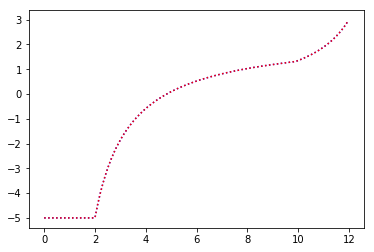

In [46]:
det = []
for i in range(len(t)):
    det.append(Deltafunc(t[i]))
plt.plot(t,det,markersize =1,linestyle = ':',color ='blue')
plt.plot(data_d[0],data_d[1],markersize =1,linestyle = ':',color = 'red')

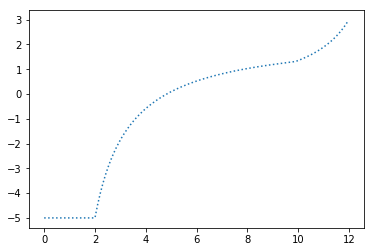

In [42]:
data_d = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_4_23/Overlap2023_01_04_01_39_11_L20_1',delimiter=',')
plt.plot(data_d[0],data_d[1],markersize =1,linestyle = ':')